In [1]:
import pymysql
from sqlalchemy import create_engine
import pandas as pd
import getpass  # To get the password without showing the input
import sqlalchemy 
from sqlalchemy import create_engine

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import BASE_COLORS

In [2]:
alldata = pd.read_csv(r'\Users\marcp\Desktop\Ironhack\Clases\Week 4\Class Weekly Project\alldata.csv')

In [3]:
alldata.head()

,position,company,description,reviews,location
0,Development Director,ALS TDI,Development Director\nALS Therapy Development ...,NaN,"Atlanta, GA 30301"
1,An Ostentatiously-Excitable Principal Research...,The Hexagon Lavish,"Job Description\n\n""The road that leads to acc...",NaN,"Atlanta, GA"
2,Data Scientist,Xpert Staffing,"Growing company located in the Atlanta, GA are...",NaN,"Atlanta, GA"
3,Data Analyst,Operation HOPE,DEPARTMENT: Program OperationsPOSITION LOCATIO...,44.0,"Atlanta, GA 30303"
4,Assistant Professor -TT - Signal Processing & ...,Emory University,DESCRIPTION\nThe Emory University Department o...,550.0,"Atlanta, GA"


In [4]:
alldata.columns

Index(['position', 'company', 'description', 'reviews', 'location'], dtype='object')

In [5]:
# Types of data
alldata.dtypes

position        object
company         object
description     object
reviews        float64
location        object
dtype: object

In [6]:
#Exploring
alldata.isnull().sum()

position         11
company          11
description      11
reviews        1638
location         11
dtype: int64

In [7]:
# We investigate more, regarding the nulls in reviews, if it's a significant amount, we will not conclude the first question
# We discart to answer our first question as NaN represents a 23% of the review population
alldata.isna().mean().round(4) * 100

position        0.16
company         0.16
description     0.16
reviews        23.52
location        0.16
dtype: float64

In [8]:
alldata.shape

(6964, 5)

In [9]:
# Drop reviews column

alldata.drop(['reviews'], axis = 1, inplace = True) 

In [10]:
#Check
alldata.head()

,position,company,description,location
0,Development Director,ALS TDI,Development Director\nALS Therapy Development ...,"Atlanta, GA 30301"
1,An Ostentatiously-Excitable Principal Research...,The Hexagon Lavish,"Job Description\n\n""The road that leads to acc...","Atlanta, GA"
2,Data Scientist,Xpert Staffing,"Growing company located in the Atlanta, GA are...","Atlanta, GA"
3,Data Analyst,Operation HOPE,DEPARTMENT: Program OperationsPOSITION LOCATIO...,"Atlanta, GA 30303"
4,Assistant Professor -TT - Signal Processing & ...,Emory University,DESCRIPTION\nThe Emory University Department o...,"Atlanta, GA"


In [11]:
# We drop the rest of the nulls
newdata = alldata.dropna(axis=0, how='all')

In [12]:
newdata.shape

(6953, 4)

In [13]:
# Regarding question 2:
# 1. Explore the data in description
# 2. Clean the data if possible
# 3. Answer Q2
# 4. Answer Q2.1 -- As it's the same but oriented to DA position
# 5. Visualize


In [14]:
# Change the Head
newdata.columns = [x.upper() for x in newdata.columns]

In [15]:
# We change the type from object to categorial

newdata.DESCRIPTION = newdata.DESCRIPTION.astype('category')

C:\Users\marcp\anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [16]:
newdata.dtypes

POSITION         object
COMPANY          object
DESCRIPTION    category
LOCATION         object
dtype: object

In [17]:
# We print the first row to explore it
newdata['DESCRIPTION'][0]

"Development Director\nALS Therapy Development Institute has an immediate opening for Development Directors. Reporting directly to the Senior Development Director, the Development Director at ALS TDI is a senior fundraising position working to identifying potential prospects and cultivating solicitation strategies and in closing asks with donors including individuals and corporations by building networks via events, generating awareness of ALS TDI; outreach including attending and speaking at events as well as personally cultivates relationships with patients, prospects and donors. This position will be responsible for generating and managing a portfolio of at least two million to five million dollars per year. This position will be located in Atlanta, GA.\n\nRequirements:\nBachelor's Degree requiredMinimum 6-8 years' experience in fundraising and business developmentSuccessful track recording in fundraising with major donors or scientific sales preferredDemonstrated ability to work in

In [18]:
# We low it

l = newdata['DESCRIPTION'][0].lower()

In [19]:
l

"development director\nals therapy development institute has an immediate opening for development directors. reporting directly to the senior development director, the development director at als tdi is a senior fundraising position working to identifying potential prospects and cultivating solicitation strategies and in closing asks with donors including individuals and corporations by building networks via events, generating awareness of als tdi; outreach including attending and speaking at events as well as personally cultivates relationships with patients, prospects and donors. this position will be responsible for generating and managing a portfolio of at least two million to five million dollars per year. this position will be located in atlanta, ga.\n\nrequirements:\nbachelor's degree requiredminimum 6-8 years' experience in fundraising and business developmentsuccessful track recording in fundraising with major donors or scientific sales preferreddemonstrated ability to work in

In [20]:
# Test, how many times machine learning appear in the data frame?

machine_learning = [row.lower().count('machine learning') for row in newdata['DESCRIPTION']]
sum(machine_learning)

# The word Machine learning appears 7205 times. We define everything as lower for not missing rows 

7205

In [21]:
# We degine a function for counting key words

def keywords(x):
    num = [str(row).lower().count(x) for row in newdata['DESCRIPTION']]
    return x,sum(num)

In [22]:
keywords('machine learning') # It works!

('machine learning', 7205)

In [23]:
# We define the list of the Keywords to be counted

key = ['SQL', 'sequel', 'MySQL', 'SQL Server', 'PostgreSQL', 'machine learning', 'Python', 'Ruby', 'R', 'Javascript', 'Java', 'excel', 'Microsoft Office', 'Powerpoint', 'Visualization', 'Tableau', 'Trello', 'Asana', 'Google Data Studio', 'Snowflake', 'AWS', 'Research', 'web scrapping', 'PowerBI']


In [24]:
# We need to low everything

lkey = list(map(lambda x:x.lower(),key))


In [25]:
# We design a function for counting key words

d =[]

for x in lkey:
            num = [str(row).lower().count(x) for row in newdata['DESCRIPTION']]
            d.append(sum(num))
d

[3029,
 1,
 181,
 139,
 110,
 7205,
 3717,
 215,
 1423566,
 459,
 1968,
 5831,
 344,
 528,
 1475,
 601,
 7,
 5,
 5,
 20,
 1706,
 16170,
 1,
 31]

In [26]:
D = {'keywords':lkey, 'count': d}
D

{'keywords': ['sql',
  'sequel',
  'mysql',
  'sql server',
  'postgresql',
  'machine learning',
  'python',
  'ruby',
  'r',
  'javascript',
  'java',
  'excel',
  'microsoft office',
  'powerpoint',
  'visualization',
  'tableau',
  'trello',
  'asana',
  'google data studio',
  'snowflake',
  'aws',
  'research',
  'web scrapping',
  'powerbi'],
 'count': [3029,
  1,
  181,
  139,
  110,
  7205,
  3717,
  215,
  1423566,
  459,
  1968,
  5831,
  344,
  528,
  1475,
  601,
  7,
  5,
  5,
  20,
  1706,
  16170,
  1,
  31]}

In [33]:
d = pd.DataFrame(D)
d

,keywords,count
0,sql,3029
1,sequel,1
2,mysql,181
3,sql server,139
4,postgresql,110
5,machine learning,7205
6,python,3717
7,ruby,215
8,r,1423566
9,javascript,459


In [43]:
# We drop the main value as it's r, we were looking for R as a tool, not as a letter
d1 = d.drop(d.index[8])

In [53]:
# We sort he values 
d2 = d1.sort_values(by='count', ascending=False)

In [49]:
d1.dtypes

keywords    object
count        int64
dtype: object

In [66]:
d3 = d2.head(10)

In [64]:
d2['keywords'].value_counts(count)[:20].plot(kind='barh')

NameError: name 'count' is not defined

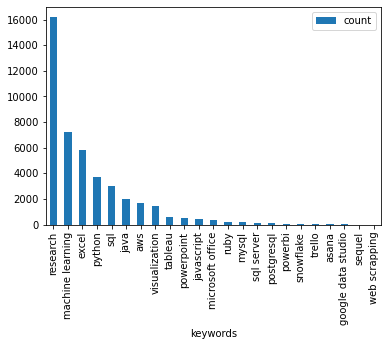

In [71]:
ax = d2.plot.bar(x='keywords', y='count')

In [78]:
# NOW THE SAME BUT JUST FOR DATA ANALYST POSITION
newdata.head()

,POSITION,COMPANY,DESCRIPTION,LOCATION
0,Development Director,ALS TDI,Development Director\nALS Therapy Development ...,"Atlanta, GA 30301"
1,An Ostentatiously-Excitable Principal Research...,The Hexagon Lavish,"Job Description\n\n""The road that leads to acc...","Atlanta, GA"
2,Data Scientist,Xpert Staffing,"Growing company located in the Atlanta, GA are...","Atlanta, GA"
3,Data Analyst,Operation HOPE,DEPARTMENT: Program OperationsPOSITION LOCATIO...,"Atlanta, GA 30303"
4,Assistant Professor -TT - Signal Processing & ...,Emory University,DESCRIPTION\nThe Emory University Department o...,"Atlanta, GA"


In [97]:
# 1. CONVERT ALLDATA TO DATA ANALYST DATA FRAME
DA = newdata[newdata['POSITION'].isin([ "Data Analyst"])]

In [98]:
DA.head(5)

,POSITION,COMPANY,DESCRIPTION,LOCATION
3,Data Analyst,Operation HOPE,DEPARTMENT: Program OperationsPOSITION LOCATIO...,"Atlanta, GA 30303"
298,Data Analyst,Applied Systems Inc.,Job Description\nMake a Difference Every Day w...,"Austin, TX"
1363,Data Analyst,TrueMotion,At TrueMotion we’re motivated by three things:...,"Boston, MA"
2247,Data Analyst,Uptown Treehouse,The Data Scientist will lead the charge in lev...,"Los Angeles, CA 90028"
2498,Data Analyst,Amazon.com,Job Description\nThe Alexa Information team st...,"Cambridge, MA"


In [99]:
# Apply function for counting key words

d =[]

for x in lkey:
            num = [str(row).lower().count(x) for row in DA['DESCRIPTION']]
            d.append(sum(num))
d

[37,
 0,
 2,
 2,
 0,
 9,
 22,
 1,
 4072,
 2,
 3,
 19,
 1,
 5,
 12,
 13,
 0,
 0,
 0,
 0,
 5,
 35,
 0,
 0]

In [100]:
# Joind list of key words with 
D = {'keywords':lkey, 'count': d}
D

{'keywords': ['sql',
  'sequel',
  'mysql',
  'sql server',
  'postgresql',
  'machine learning',
  'python',
  'ruby',
  'r',
  'javascript',
  'java',
  'excel',
  'microsoft office',
  'powerpoint',
  'visualization',
  'tableau',
  'trello',
  'asana',
  'google data studio',
  'snowflake',
  'aws',
  'research',
  'web scrapping',
  'powerbi'],
 'count': [37,
  0,
  2,
  2,
  0,
  9,
  22,
  1,
  4072,
  2,
  3,
  19,
  1,
  5,
  12,
  13,
  0,
  0,
  0,
  0,
  5,
  35,
  0,
  0]}

In [101]:
da = pd.DataFrame(D)
da

,keywords,count
0,sql,37
1,sequel,0
2,mysql,2
3,sql server,2
4,postgresql,0
5,machine learning,9
6,python,22
7,ruby,1
8,r,4072
9,javascript,2


In [103]:
# We drop the main value as it's r, we were looking for R as a tool, not as a letter
da = da.drop(da.index[8])

In [105]:
# We sort he values 
da1 = da.sort_values(by='count', ascending=False)

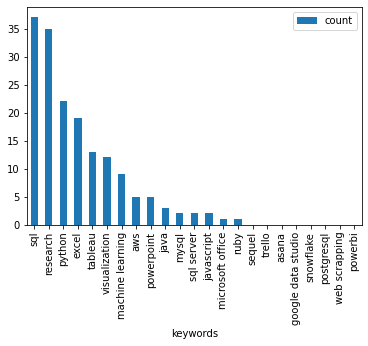

In [107]:
ax = da1.plot.bar(x='keywords', y='count')

In [108]:
da1

,keywords,count
0,sql,37
21,research,35
6,python,22
11,excel,19
15,tableau,13
14,visualization,12
5,machine learning,9
20,aws,5
13,powerpoint,5
10,java,3
